Exoplanet Transit Lab $\newline$
SBID# 113181913 $\newline$
Co-authors: SBID# 113164004, SBID# 113827547, SBID# 113378962 $\newline$
Affiliations: Department of Physics and Astronomy, Stony Brook University, Stony Brook, NY
11794, USA

In [4]:
# Importing all necessary packages
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import CCDData
from ccdproc import *
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import os

In [5]:
# reading in all the darkframe files taken at 50s and taking the median combine

dark1 = CCDData.read('lab2_darkframe_visible.00000021.DARK.FIT', unit='adu')
dark2 = CCDData.read('lab2_darkframe_visible.00000022.DARK.FIT', unit='adu')
dark3 = CCDData.read('lab2_darkframe_visible.00000023.DARK.FIT', unit='adu')
dark4 = CCDData.read('lab2_darkframe_visible.00000024.DARK.FIT', unit='adu')
dark5 = CCDData.read('lab2_darkframe_visible.00000025.DARK.FIT', unit='adu')
dark6 = CCDData.read('lab2_darkframe_visible.00000026.DARK.FIT', unit='adu')
dark7 = CCDData.read('lab2_darkframe_visible.00000027.DARK.FIT', unit='adu')
dark8 = CCDData.read('lab2_darkframe_visible.00000028.DARK.FIT', unit='adu')
dark9 = CCDData.read('lab2_darkframe_visible.00000029.DARK.FIT', unit='adu')
dark10 = CCDData.read('lab2_darkframe_visible.00000030.DARK.FIT', unit='adu')

combined_darks = Combiner([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10])
master_dark_50s = combined_darks.median_combine()

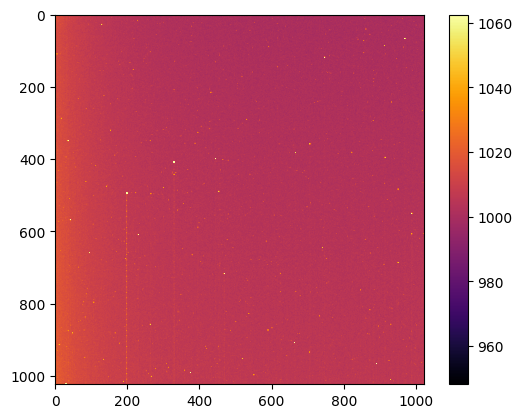

In [6]:
# plotting the master dark image

plt.imshow(master_dark_50s.data, cmap='inferno', vmin= np.mean(master_dark_50s.data) - 3*np.std(master_dark_50s.data), vmax = np.mean(master_dark_50s.data) + 3*np.std(master_dark_50s.data))
plt.colorbar()

4.1

In [7]:
# reading in all the darkframe files taken at 5s and taking the median combine
dark11 = CCDData.read('lab2_darkframe_visible.00000031.FIT', unit='adu')
dark12 = CCDData.read('lab2_darkframe_visible.00000032.FIT', unit='adu')
dark13 = CCDData.read('lab2_darkframe_visible.00000033.FIT', unit='adu')
dark14 = CCDData.read('lab2_darkframe_visible.00000034.FIT', unit='adu')
dark15 = CCDData.read('lab2_darkframe_visible.00000035.FIT', unit='adu')
dark16 = CCDData.read('lab2_darkframe_visible.00000036.FIT', unit='adu')
dark17 = CCDData.read('lab2_darkframe_visible.00000037.FIT', unit='adu')
dark18 = CCDData.read('lab2_darkframe_visible.00000038.FIT', unit='adu')

combined_darks2 = Combiner([dark11, dark12, dark13, dark14, dark15, dark16, dark17, dark18])
master_dark_5s = combined_darks2.median_combine()

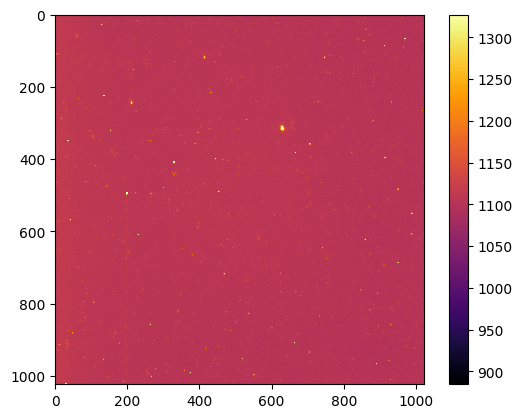

In [8]:
# plotting the master dark image
plt.imshow(master_dark_5s.data, cmap='inferno', vmin= np.mean(master_dark_5s.data) - 3*np.std(master_dark_5s.data), vmax = np.mean(master_dark_5s.data) + 3*np.std(master_dark_5s.data))
plt.colorbar()

In [9]:
# reading in all the flatfield files and taking the median combine
flat1 = CCDData.read('lab2_flatfield_visible.00000010.FLAT.FIT', unit='adu')
flat2 = CCDData.read('lab2_flatfield_visible.00000011.FLAT.FIT', unit='adu')
flat3 = CCDData.read('lab2_flatfield_visible.00000012.FLAT.FIT', unit='adu')
flat4 = CCDData.read('lab2_flatfield_visible.00000013.FLAT.FIT', unit='adu')
flat5 = CCDData.read('lab2_flatfield_visible.00000014.FLAT.FIT', unit='adu')
flat6 = CCDData.read('lab2_flatfield_visible.00000015.FLAT.FIT', unit='adu')
flat7 = CCDData.read('lab2_flatfield_visible.00000016.FLAT.FIT', unit='adu')
flat8 = CCDData.read('lab2_flatfield_visible.00000017.FLAT.FIT', unit='adu')
flat9 = CCDData.read('lab2_flatfield_visible.00000018.FLAT.FIT', unit='adu')
flat10 = CCDData.read('lab2_flatfield_visible.00000019.FLAT.FIT', unit='adu')

combiner_flats = Combiner([flat1, flat2, flat3, flat4, flat5, flat6, flat7, flat8, flat9, flat10])
combined_median_flats = np.array(combiner_flats.median_combine())
mean_flats = np.mean(combined_median_flats)
master_flat = combined_median_flats/mean_flats 

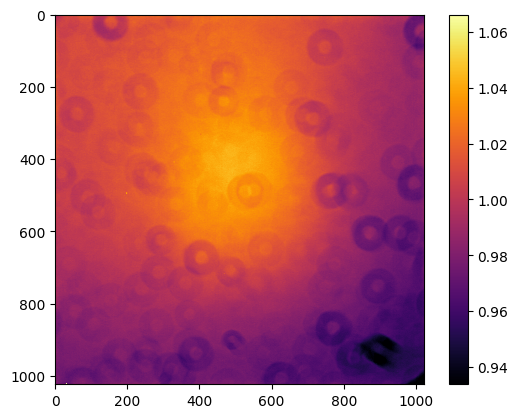

In [10]:
# plotting the master dark frame
plt.imshow(master_flat, cmap='inferno', vmin = np.mean(master_flat) - 3*(np.std(master_flat)), vmax= np.mean(master_flat) + 3*(np.std(master_flat)))
plt.colorbar()

In [11]:
# renaming all the science image files to account for the missing files
    # also removes the unecessary 0's that are automatically added to the file name when collecting data

# path = '/home/gaybee/AST443_LAB2/'

# renaming_index = 0
# for i in range(39, 100):
#     filename = f'lab2_star_visible.000000{i}.FIT'
#     if os.path.exists(filename):
#         os.rename(os.path.join(path, filename), os.path.join(path, 'lab2_star_visible.'+str(renaming_index)+'.FIT'))
#         #print(renaming_index, i)
#         renaming_index += 1
# for j in range(100, 582):
#     filename = f'lab2_star_visible.00000{j}.FIT'
#     if os.path.exists(filename):
#         os.rename(os.path.join(path, filename), os.path.join(path, 'lab2_star_visible.'+str(renaming_index)+'.FIT'))
#         #print(renaming_index, j)
#         renaming_index += 1

## code is commented out so as not to rerun and change the files more than once

In [12]:
# creates a list of all the file numbers for each science image
    # this allows us to loop over these filenumbers easily

strings = os.listdir("/home/gaybee/AST443_LAB2")

file_numbers1 = []
for i in strings:
    if ('lab2_star_visible' in i) and (not 'FLAT' in i) and (not 'DARK' in i) and (not 'Zone' in i):
        file_numbers1.append(int(i[18:-4]))

file_numbers1 = np.sort(file_numbers1)

In [13]:
# producing the science.fit files by calibrating the raw data files

# callibrate the files and write to science{i}.FIT
# for i in file_numbers1:
#     hdu_science = fits.PrimaryHDU((CCDData.read(f'lab2_star_visible.{i}.FIT', unit='adu').data - (master_dark_5s.data)) / master_flat)
#     hdu_science.writeto(f'science{i}.FIT', overwrite=True)

## code is commented out so as not to rerun and create new files and/or change the current files

Question 4.3 Flux and Flux error values of host star

For our choice of aperature, we used 24 in the sextractor default.sex file. We used ds9 to create a circular region around the target star and then found the radius of that circle region which was 12. Since the aperature on the default.sex file is a diameter, we multiplied by 2.

In [14]:
# creating an array of all the times at which the images were taken
time = np.array([])
for i in range(0,461):
    science = fits.open(f'lab2_star_visible.{i}.FIT')
    header_image = dict(science[0].header)
    date_str = (header_image.get('DATE-OBS'))
    date_format = '%Y-%m-%dT%H:%M:%S.%f'
    date_obj = datetime.strptime(date_str, date_format)
    time = np.append(time, date_obj.timestamp())

delta_time = time - time[0]

FileNotFoundError: [Errno 2] No such file or directory: 'lab2_star_visible.5.FIT'

In [ ]:
# creates a list of all the science file numbers
strings = os.listdir("/home/gaybee/AST443_LAB2")

file_numbers4 = []
for i in strings:
    if ('science' in i) and ('FIT' in i) and (not 'Zone' in i):
        file_numbers4.append(int(i[7:-4]))

file_numbers4 = np.sort(file_numbers4)

In [ ]:
# creates a list of all the file numbers for each science.new image

file_numbers3 = []
for i in strings:
    if ('science' in i) and ('new' in i) and (not 'Zone' in i):
        file_numbers3.append(int(i[7:-4]))

file_numbers3 = np.sort(file_numbers3)

in terminal run bash script 

#!/bin/bash                                                                               
for i in {0..542..1}
do
 sex science$i.new -c default.se -CATALOG_NAME science$i.cat
done

creates .cat files

In [ ]:
file_numbers = []
for i in strings:
    if ('science' in i) and ('cat' in i) and (not 'Zone' in i):
        file_numbers.append(int(i[7:-4]))

file_numbers = np.sort(file_numbers)

In [ ]:
# creating a function that will calculate the flux series and flux error series of any given star
    # call the function with the RA and DEC coordinates for each star

list_range = list(range(0,461))

def coord(ra_c0, dec_c0):
    star_flux_series = np.empty(len(list_range))
    star_flux_error_series = np.empty(len(list_range))
    for i,value in enumerate(list_range):
        data = np.loadtxt(f'science{value}.cat')
        ra = data[:,3]
        dec = data[:,4]
        diff = np.abs(ra-ra_c0) + np.abs(dec-dec_c0)
        index = np.argmin(diff)
        flux = data[:,5]
        star_flux_series[i] = flux[index]
        error = data[:,6]
        star_flux_error_series[i] = error[index]
    return star_flux_series, star_flux_error_series

Text(0.5, 0, 'Time [seconds]')

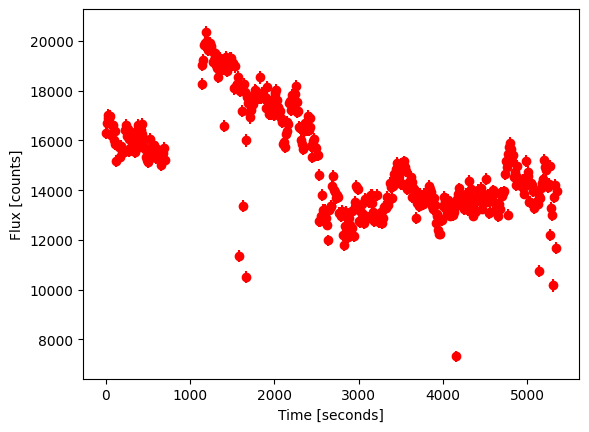

In [ ]:
#LightCurve for Target Star
star_flux_values, error_values = coord(354.7742092,42.4659736)
plt.errorbar(delta_time, star_flux_values, yerr= error_values, fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

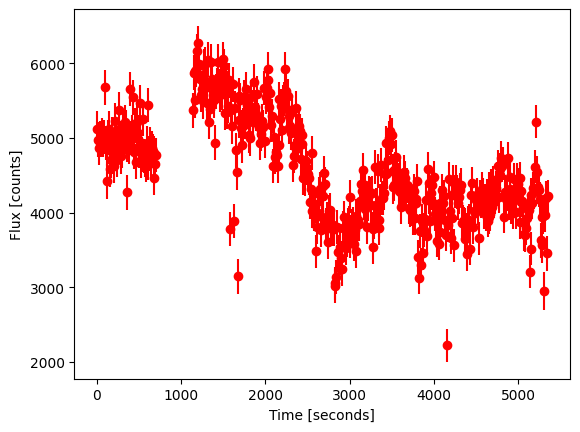

In [ ]:
#LightCurve for Reference Star 1
star_flux_values1, error_values1 = coord(354.7461225, 42.4105149)
plt.errorbar(delta_time, star_flux_values1, yerr= error_values1 , fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

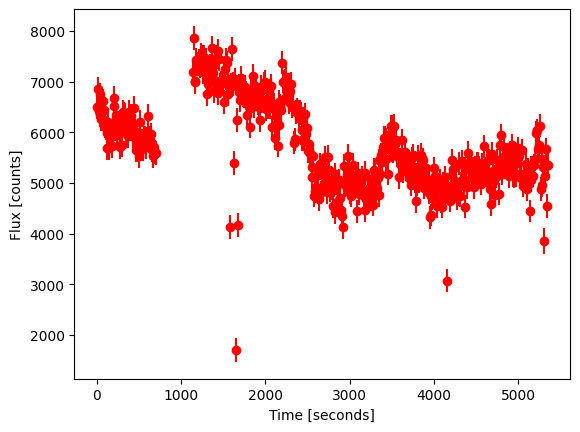

In [ ]:
#LightCurve for Reference Star 2
star_flux_values2, error_values2 = coord(354.6726729, 42.4452380)
plt.errorbar(delta_time, star_flux_values2, yerr= error_values2 , fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

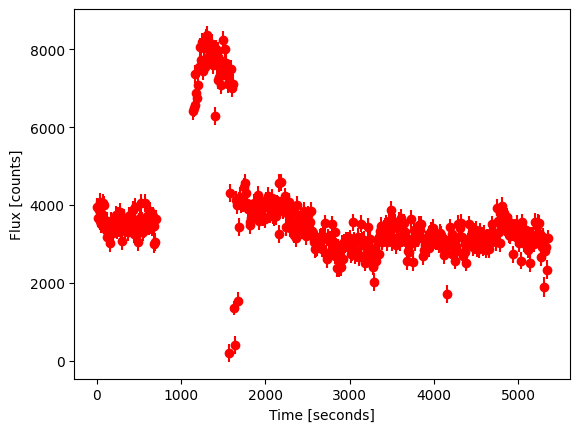

In [ ]:
#LightCurve for Reference Star 3
star_flux_values3, error_values3 = coord(355.0022708, 42.5443389)
plt.errorbar(delta_time, star_flux_values3, yerr= error_values3 , fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

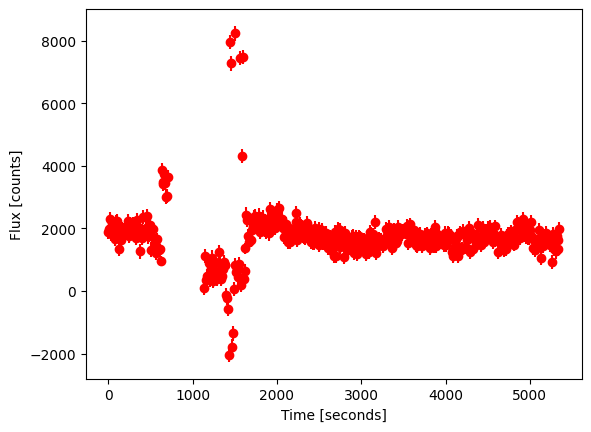

In [ ]:
#LightCurve for Reference Star 4
star_flux_values4, error_values4 = coord(354.9839625, 42.4900278)
plt.errorbar(delta_time, star_flux_values4, yerr= error_values4 , fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

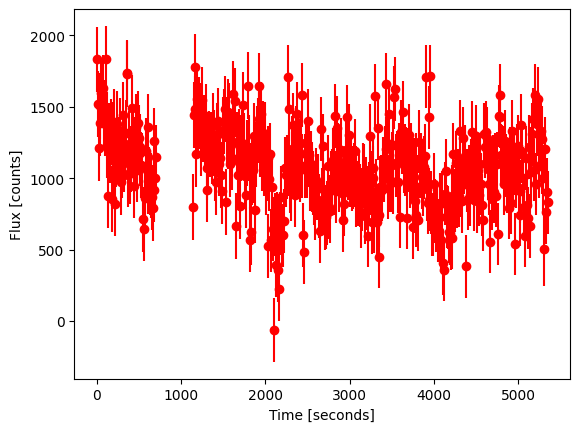

In [ ]:
#LightCurve for Reference Star 5
star_flux_values5, error_values5 = coord(354.7337875, 42.5240611 )
plt.errorbar(delta_time, star_flux_values5, yerr= error_values5 , fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

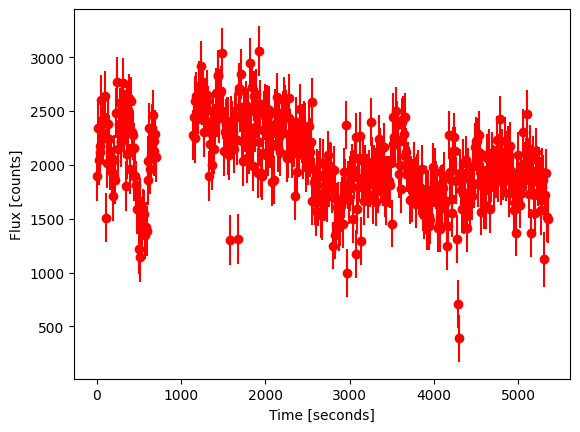

In [ ]:
#LightCurve for Reference Star 6
star_flux_values6, error_values6 = coord(354.6936375, 42.4198611 )
plt.errorbar(delta_time, star_flux_values6, yerr= error_values6 , fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

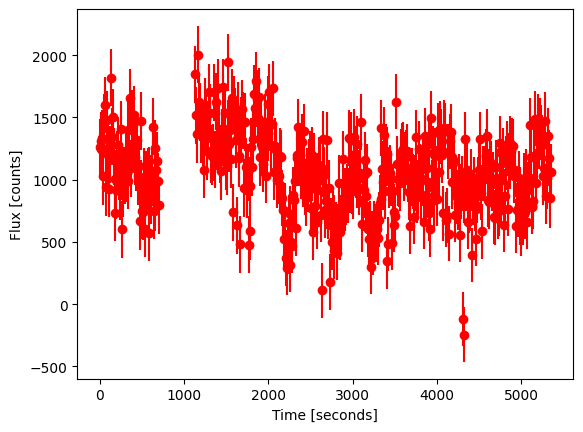

In [ ]:
#LightCurve for Reference Star 7
star_flux_values7, error_values7 = coord(354.8054958, 42.4306833 )
plt.errorbar(delta_time, star_flux_values7, yerr= error_values7, fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

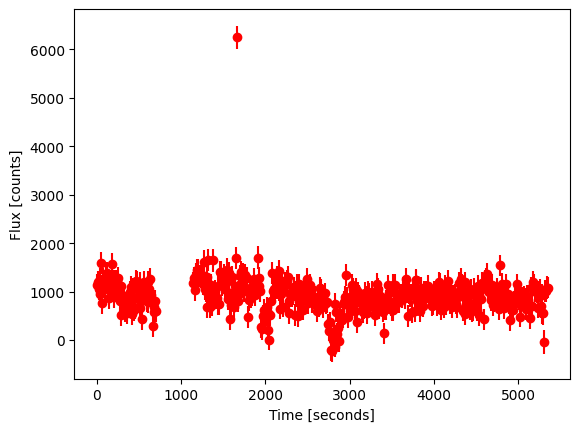

In [ ]:
#LightCurve for Reference Star 8
star_flux_values8, error_values8 = coord(354.6686042, 42.4914167)
plt.errorbar(delta_time, star_flux_values8, yerr= error_values8, fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Text(0.5, 0, 'Time [seconds]')

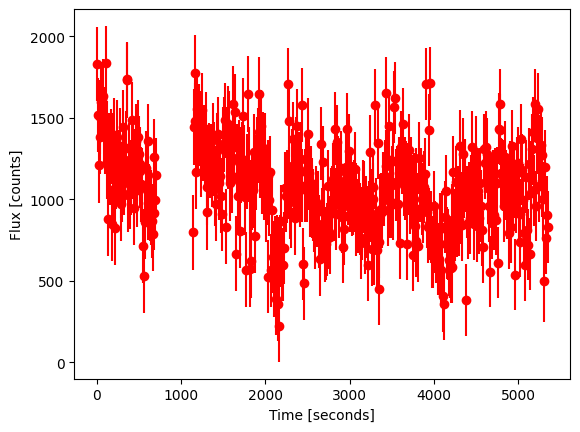

In [ ]:
#LightCurve for Reference Star 9
star_flux_values9, error_values9 = coord(354.7341958, 42.5238472)
plt.errorbar(delta_time, star_flux_values9, yerr= error_values9, fmt='o', color='red')
plt.ylabel('Flux [counts]')
plt.xlabel('Time [seconds]')

Question 4.4: Rescale both the flux and error on the flux by the star’s average flux

In [ ]:
# defining the scaled flux and scaled error
def scaled_flux(star_flux):
    return star_flux / np.mean(star_flux)
def scaled_error(star_flux, error):
    return error / np.mean(star_flux)

Text(0, 0.5, 'Normalized Flux')

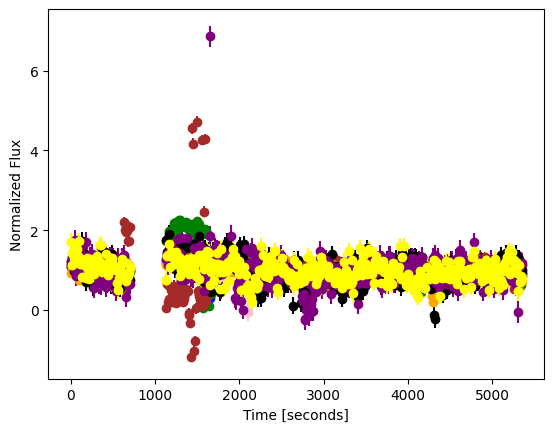

In [ ]:
# plotting the normed flux of all reference stars on top of each other 
scaled_fluxes = [scaled_flux(star_flux_values1), scaled_flux(star_flux_values2), scaled_flux(star_flux_values3), scaled_flux(star_flux_values4), 
                scaled_flux(star_flux_values5), scaled_flux(star_flux_values6), scaled_flux(star_flux_values7), scaled_flux(star_flux_values8), scaled_flux(star_flux_values9)]
errors = [scaled_error(star_flux_values1, error_values1), scaled_error(star_flux_values2, error_values2), scaled_error(star_flux_values3, error_values3),
             scaled_error(star_flux_values4, error_values4), scaled_error(star_flux_values5, error_values5), scaled_error(star_flux_values6, error_values6), 
            scaled_error(star_flux_values7, error_values7), scaled_error(star_flux_values8, error_values8), scaled_error(star_flux_values9, error_values9)]
colors = ['red','blue', 'green', 'brown', 'pink', 'orange', 'black', 'purple', 'yellow']

for i in range(0,9):
    plt.errorbar(delta_time, scaled_fluxes[i], yerr = errors[i], fmt='o', color= colors[i])

plt.xlabel('Time [seconds]')
plt.ylabel('Normalized Flux')

Text(0, 0.5, 'Normed Flux')

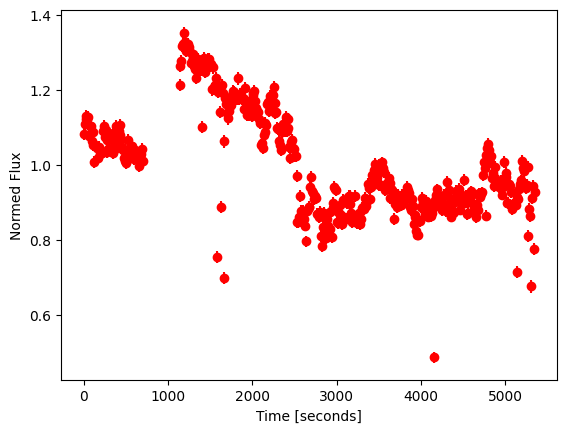

In [ ]:
#Scaled Target Star
scaled_target = star_flux_values/np.mean(star_flux_values)
scaled_error_target = error_values / np.mean(star_flux_values)
plt.errorbar(delta_time, scaled_target, yerr = scaled_error_target, fmt='o', color='red')
plt.xlabel('Time [seconds]')
plt.ylabel('Normed Flux')

4.5: 

In [ ]:
# calculating the weighted mean and weighted standard deviation
flux_ref = np.stack((scaled_flux(star_flux_values1), scaled_flux(star_flux_values2), scaled_flux(star_flux_values3), scaled_flux(star_flux_values4), scaled_flux(star_flux_values5), scaled_flux(star_flux_values6), scaled_flux(star_flux_values7), scaled_flux(star_flux_values8), scaled_flux(star_flux_values9)))
error_ref = np.stack((scaled_error(star_flux_values1, error_values1), scaled_error(star_flux_values2, error_values2), scaled_error(star_flux_values3, error_values3), scaled_error(star_flux_values4, error_values4), scaled_error(star_flux_values5, error_values5), scaled_error(star_flux_values6, error_values6), scaled_error(star_flux_values7, error_values7), scaled_error(star_flux_values8, error_values8), scaled_error(star_flux_values9, error_values9)))
weighted_mean = np.empty(461)
weighted_std = np.empty(461)

for i in range(461):
    num = 0
    dem = 0
    for j in range(9):
        num += (flux_ref[j,i] / (error_ref[j,i])**2)
        dem += (1 / (error_ref[j,i])**2)
    weighted_mean[i] = num/dem


for i in range(461):
    error = 0
    for j in range(9):
        error += 1 / (error_ref[j,i])**2
    weighted_std[i] = np.sqrt(1/error)

The equation for the linear regression is: 6.077834937809304e-06*x + 0.9883464181940652


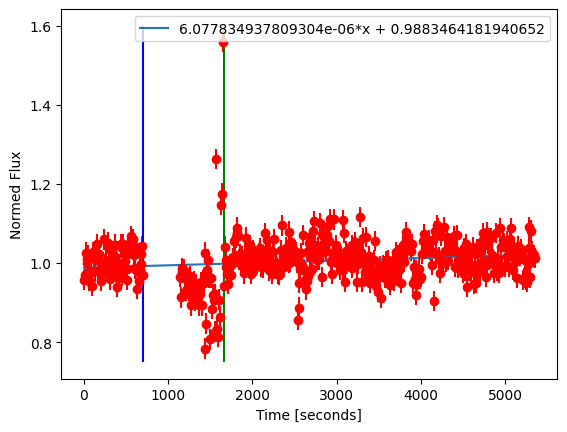

In [ ]:
# plotting the normalized flux of the target star and finding an equation of linear regression
final_normalized_target = scaled_target / weighted_mean
mean = np.mean(final_normalized_target)
std = np.std(final_normalized_target)

plt.errorbar(delta_time, final_normalized_target, yerr=weighted_std, fmt='o', color='red') 
m, b = np.polyfit(delta_time, final_normalized_target, deg = 1)
x_values = np.linspace(0,np.max(delta_time), len(delta_time))
plt.plot(x_values, m*x_values + b, label=f'{m}*x + {b}') #error bars were calculated however are too small to show up on plot 
plt.xlabel('Time [seconds]')
plt.ylabel('Normed Flux')
plt.legend()
plt.vlines(delta_time[np.where(delta_time > 703)[0][0]],0.75,1.6, colors='blue')
plt.vlines(delta_time[np.where(delta_time > 1650)[0][0]], 0.75,1.6, color='green')
print(f'The equation for the linear regression is: {m}*x + {b}')

5.0: 

Upper Bound of the Transit Depth can be determined by:
$$ \biggr|1 - \left[\langle F \rangle - \frac{3 \sigma}{\sqrt{N}} \right]\biggr|$$
From this, we can use the Transit Depth Relation to calculate the Upper Bound of the Planet Radius:
$$R_p = \sqrt{ R_{*}^2 \times \biggr|1 - \left[\langle F \rangle - \frac{3 \sigma}{\sqrt{N}} \right]\biggr|}$$

In [ ]:
#Over Full Range
radius_star = 14.20749 #jupiter radii
max_transit_depth1 = abs(1 - (np.mean(final_normalized_target) - 3 * (np.std(final_normalized_target) / np.sqrt(np.size(final_normalized_target)))))
radius_p1 = np.sqrt(radius_star**2 * (max_transit_depth1))
print(f'Upper-bound of the planet radius is: {radius_p1} Jupiter radius')

Upper-bound of the planet radius is: 0.7187543267158218 Jupiter radius


In [ ]:
flux_binned = np.empty((np.where(delta_time > 703)[0][0]))
for i in range(0,np.where(delta_time > 703)[0][0]):
    flux_binned[i] = final_normalized_target[i]
max_transit_depth2 = abs(1 - (np.mean(flux_binned) - 3 * (np.std(flux_binned) / np.sqrt(np.size(flux_binned)))))
radius_p2 = np.sqrt(radius_star**2 * (max_transit_depth2))
print(f'Upper-bound of the planet radius is: {radius_p2} Jupiter radius')

Upper-bound of the planet radius is: 1.3721727036804674 Jupiter radius


In [ ]:
flux_binned2 = np.empty(np.size(delta_time) - (np.where(delta_time > 1650)[0][0]))
for i in range(np.where(delta_time > 1650)[0][0], np.size(delta_time)):
    flux_binned2[i-117] = final_normalized_target[i]
max_transit_depth3 = abs(1 - (np.mean(flux_binned2) - 3 * (np.std(flux_binned2) / np.sqrt(np.size(flux_binned2)))))
radius_p3 = np.sqrt(radius_star**2 * (max_transit_depth3))
print(f'Upper-bound of the planet radius is: {radius_p3} Jupiter radius')

NameError: name 'np' is not defined

In [ ]:
#Calculated Planet Transit
radius_planet = 1.33 #jupiter radii
radius_star = 14.20749 #jupiter radii

print(f'Transit Depth: {radius_planet**2 / radius_star**2}')
print(f'Maximum Transit Depth: {max_transit_depth3}')

Transit Depth: 0.008763317845953545


NameError: name 'max_transit_depth3' is not defined